In [24]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
    import sys
    import os
    sys.path.append(os.path.abspath('.'))
    sys.path.append(os.path.abspath('.\.'))
    sys.path.append(os.path.abspath('c:/fontes/robustez-query'))

In [10]:
print(sys.path)

['c:\\Fontes\\robustez-query\\code\\analysis', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\python37.zip', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\DLLs', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\lib', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query', '', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\lib\\site-packages', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\lib\\site-packages\\win32', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\lib\\site-packages\\win32\\lib', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\lib\\site-packages\\Pythonwin', 'C:\\Users\\borela\\Miniconda3\\envs\\robustez-query\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\borela\\.ipython', 'c:\\Fontes\\robustez-query\\code\\analysis', 'c:\\Fontes\\robustez-query\\code\\analysis', 'c:\\Fontes\\robustez-query\\code\\analysis', 'c:\\Fontes\\robustez-query\\code\\analysis', 'c:\\Fontes\\robustez-query\\code\\analysis\\\x0contes\robustez

In [18]:
df = pd.read_csv('c:/Fontes/robustez-query/data/not_used_anymore/score_avaliation.csv', sep = ';', 
    header=0, dtype= {'cod_original_query':np.int64, 'score':str, 'eval':np.int64, 'qtd_judment_assumed_zero_relevance':np.int64, 'noise_kind':np.int64 })


In [19]:
df['score'] = df['score'].astype(float) 

In [20]:
df.head()

,cod_original_query,score,eval,qtd_judment_assumed_zero_relevance,noise_kind
0,23849,-0.008242,3,0,7
1,23849,-0.015422,3,0,7
2,23849,-0.038493,3,0,7
3,23849,-0.050908,1,0,7
4,23849,-0.055180,2,0,7


In [23]:
df.groupby('eval').agg({'score':['mean', 'count', 'median', 'min', 'max', 'std', 'var']})

score                                                        
          mean count    median       min       max       std       var
eval                                                                  
0    -0.598376   460 -0.199891 -5.425253 -0.004668  0.863050  0.744856
1    -0.299394   210 -0.053286 -3.047203 -0.002072  0.588884  0.346784
2    -0.206434   181 -0.059862 -3.309294 -0.001947  0.410376  0.168408
3    -0.174034   229 -0.028724 -3.746747 -0.001683  0.486373  0.236559

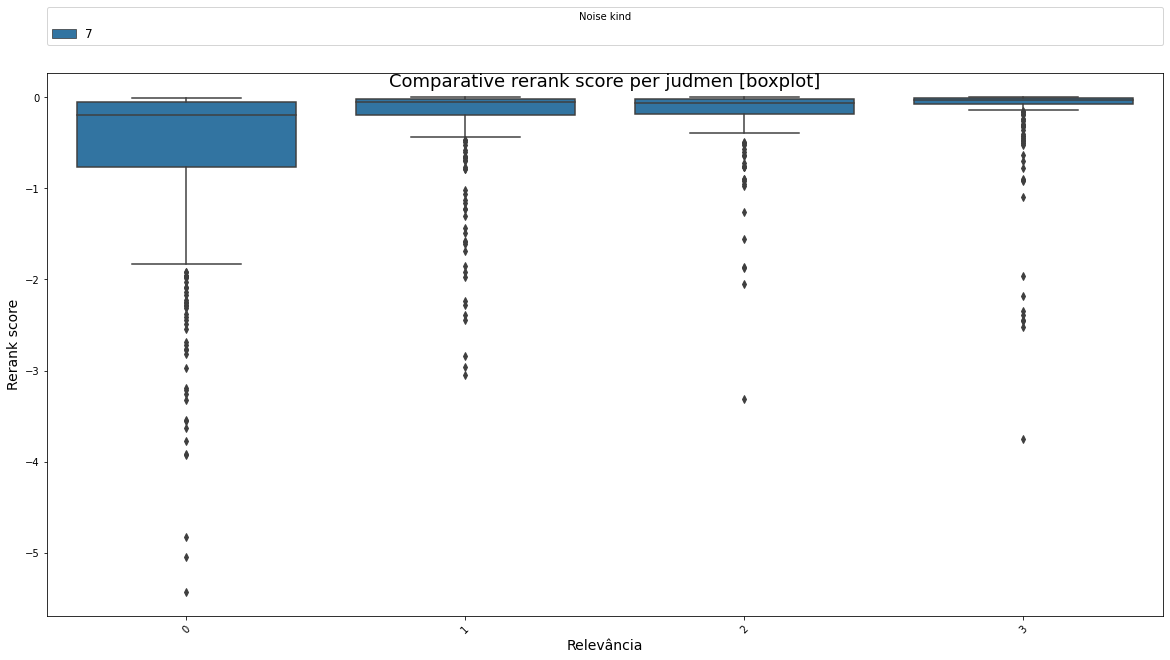

In [26]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x='eval', hue="noise_kind", y="score", ax=ax,  data=df, showfliers = True)
plt.xlabel('Relevância', fontsize=14)
plt.ylabel('Rerank score', fontsize=14)
plt.xticks(rotation=45)
ax.set_title('Comparative rerank score per judmen [boxplot]', y=1.0, pad=-14, fontsize=18)
plt.legend(bbox_to_anchor=(0., 1.05, 1., 1.02), loc=3, ncol=3,  borderaxespad=0., mode="expand", fontsize=12, title = 'Noise kind') 
plt.show()

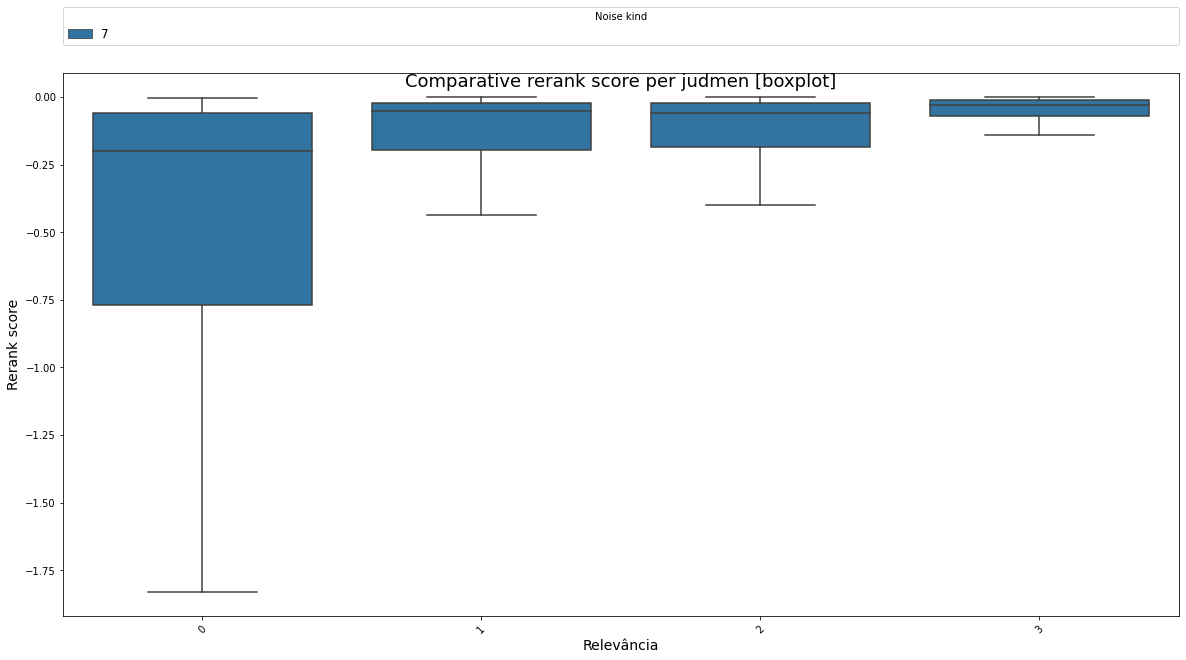

In [28]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x='eval', hue="noise_kind", y="score", ax=ax,  data=df, showfliers = False)
plt.xlabel('Relevância', fontsize=14)
plt.ylabel('Rerank score', fontsize=14)
plt.xticks(rotation=45)
ax.set_title('Comparativo: score x relevância @ rerank unicamp-dl/ptt5-base-pt-msmarco-100k', y=1.0, pad=-14, fontsize=18)
plt.legend(bbox_to_anchor=(0., 1.05, 1., 1.02), loc=3, ncol=3,  borderaxespad=0., mode="expand", fontsize=12, title = 'Noise kind') 
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


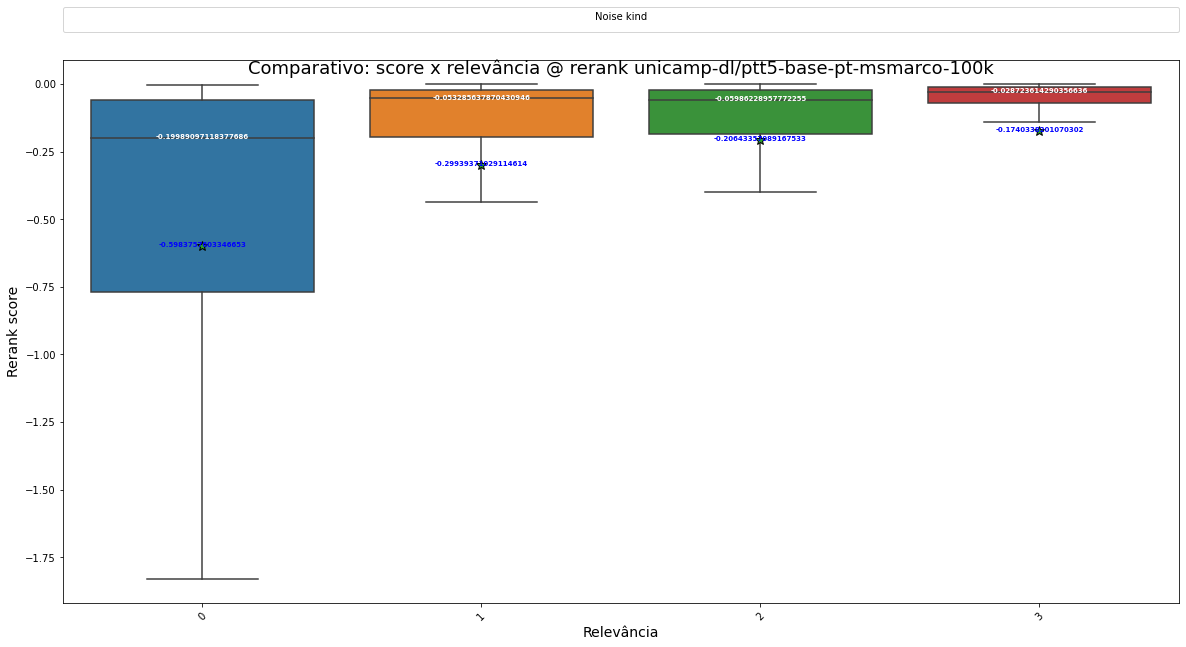

In [42]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x='eval',  y="score", ax=ax,  data=df, showfliers = False, showmeans=True, meanprops={"marker": "*",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.xlabel('Relevância', fontsize=14)
plt.ylabel('Rerank score', fontsize=14)
plt.xticks(rotation=45)
ax.set_title('Comparativo: score x relevância @ rerank unicamp-dl/ptt5-base-pt-msmarco-100k', y=1.0, pad=-14, fontsize=18)
plt.legend(bbox_to_anchor=(0., 1.05, 1., 1.02), loc=3, ncol=3,  borderaxespad=0., mode="expand", fontsize=12, title = 'Noise kind') 

medians = df.groupby(['eval'])['score'].median()
means = df.groupby(['eval'])['score'].mean()
vertical_offset = df['score'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
# vertical_offset = df['score'].mean() * 0.05 # offset from median for display
    ax.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='b',weight='semibold')

plt.show()

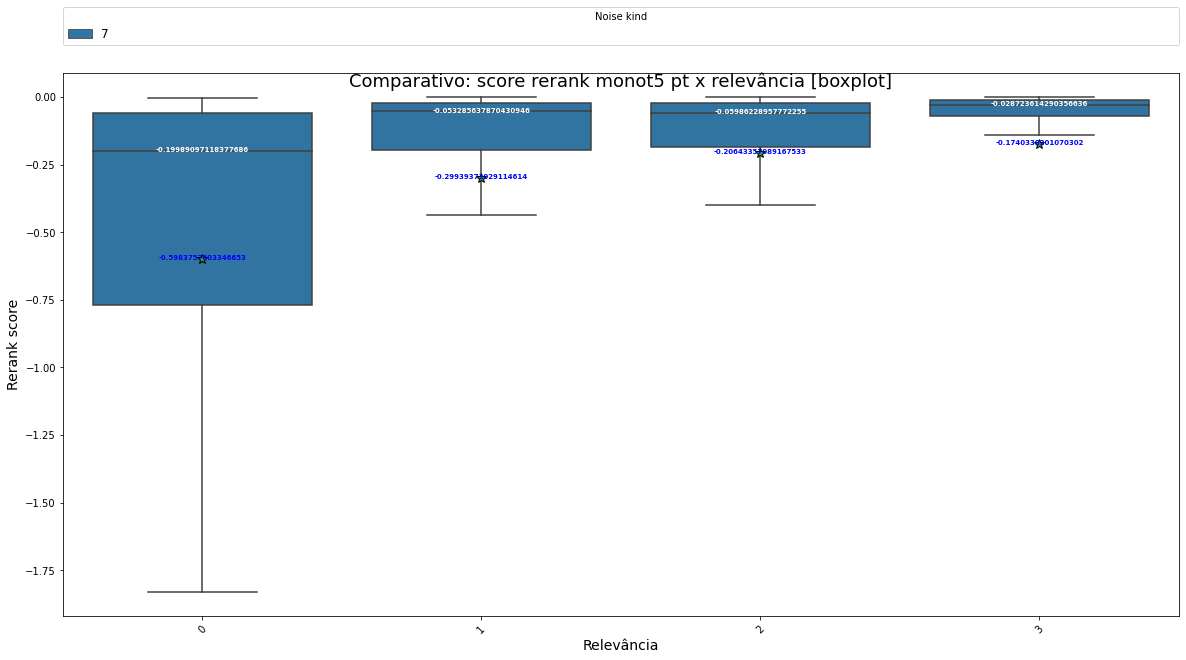

In [40]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x='eval', hue="noise_kind", y="score", ax=ax,  data=df, showfliers = False, showmeans=True, meanprops={"marker": "*",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.xlabel('Relevância', fontsize=14)
plt.ylabel('Rerank score', fontsize=14)
plt.xticks(rotation=45)
ax.set_title('Comparativo: score x relevância @ rerank unicamp-dl/ptt5-base-pt-msmarco-100k', y=1.0, pad=-14, fontsize=18)
plt.legend(bbox_to_anchor=(0., 1.05, 1., 1.02), loc=3, ncol=3,  borderaxespad=0., mode="expand", fontsize=12, title = 'Noise kind') 

medians = df.groupby(['eval'])['score'].median()
means = df.groupby(['eval'])['score'].mean()
vertical_offset = df['score'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
# vertical_offset = df['score'].mean() * 0.05 # offset from median for display
    ax.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='b',weight='semibold')

plt.show()